In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#📌 Extracción

In [2]:
import pandas as pd
ruta = '/content/drive/MyDrive/Alura Latam/TelecomX/TelecomX_Data.json'


#🔧 Transformación

In [3]:
Df = pd.read_json(ruta)
Df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#📊 Carga y análisis

## Conocer el Conjunto de Datos

In [4]:
Df.dtypes
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## comprobacion de valores vacios o inconsistentes


remplazar los datos vacios por 'no' dado a que no representa un gran porcentaje de valores totales dando solo un 3% de valores vacios en la columna churn

In [5]:
print((Df['Churn'] == '').mean() * 100)
Df.isnull().sum()
for col in Df.columns:
  print( col , (Df[col] == '').sum())
  if (Df[col] == '').sum():
    Df[col].replace('', 'No', inplace=True)

3.0824274115866244
customerID 0
Churn 224
customer 0
phone 0
internet 0
account 0


<ipython-input-5-4025919854>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df[col].replace('', 'No', inplace=True)


Normalizacion de todos los datso de tipo diccionario

In [6]:
customer_df = pd.json_normalize(Df['customer'])
for col in customer_df.columns:
  print( col , (customer_df[col] == '').sum())
customer_df.isnull().sum()

gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0


In [7]:
phone_df = pd.json_normalize(Df['phone'])
for col in phone_df.columns:
  print( col , (phone_df[col] == '').sum())
phone_df.isnull().sum()


PhoneService 0
MultipleLines 0


,0
PhoneService,0
MultipleLines,0


In [8]:
internet_df = pd.json_normalize(Df['internet'])
for col in internet_df.columns:
  print( col , (internet_df[col] == '').sum())
internet_df.isnull().sum()

InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0


,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


In [9]:
account_df = pd.json_normalize(Df['account'])
for col in account_df.columns:
  print( col , (account_df[col] == '').sum())
account_df.isnull().sum()

Contract 0
PaperlessBilling 0
PaymentMethod 0
Charges.Monthly 0
Charges.Total 0


,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0


## COMPROBACION DE VALORES DUPLICADOS Y UNION DE DATOS

VERIFICAR VALORES ID REPETIDOS

In [10]:
Df['customerID'].duplicated().sum()

np.int64(0)

Union de datos ya normalizados

In [30]:
df_clean = pd.concat([Df[['customerID', 'Churn']],customer_df,account_df,internet_df,phone_df], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   object 
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  InternetService   7267 non-null   object 
 13  OnlineSecurity    7267 non-null   object 
 14  OnlineBackup      7267 non-null   object 
 15  DeviceProtection  7267 non-null   object 
 16  TechSupport       7267 non-null   object 


crear nueva columa cuentas diarias


In [31]:
df_clean['Cuentas_Diarias'] = df_clean['Charges.Monthly'] / 30
df_clean.sample(15)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Cuentas_Diarias
4379,5998-DZLYR,No,Female,0,Yes,No,61,Two year,Yes,Bank transfer (automatic),...,Fiber optic,No,Yes,No,Yes,No,Yes,Yes,Yes,3.145000
2971,4123-DVHPH,No,Male,0,Yes,No,9,Month-to-month,Yes,Electronic check,...,Fiber optic,Yes,No,No,No,No,Yes,Yes,Yes,2.935000
4378,5997-OPVFA,No,Male,0,Yes,No,72,Two year,Yes,Bank transfer (automatic),...,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.968333
201,0310-VQXAM,No,Male,0,No,No,9,Month-to-month,No,Mailed check,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,No,0.661667
4681,6410-LEFEN,Yes,Female,0,No,No,9,Month-to-month,No,Electronic check,...,DSL,No,No,No,No,No,No,Yes,No,1.505000
2193,3070-BDOQC,No,Female,0,No,No,60,Two year,Yes,Electronic check,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.321667
1353,1956-YIFGE,No,Male,0,Yes,Yes,22,One year,Yes,Mailed check,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.335000
5692,7779-LGOVN,Yes,Male,1,Yes,No,10,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,No,No,No,Yes,Yes,Yes,2.888333
7085,9758-MFWGD,No,Female,1,Yes,Yes,48,One year,No,Bank transfer (automatic),...,DSL,No,Yes,No,No,No,No,No,No phone service,0.996667
663,0943-ZQPXH,No,Male,0,Yes,Yes,44,Month-to-month,Yes,Bank transfer (automatic),...,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,No,3.098333


## ANLISIS DESCRIPTIVO

In [32]:
df_clean.describe()

,SeniorCitizen,tenure,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


Estadísticas específicas de charges monthly

In [33]:
print("Media mensual:", df_clean["Charges.Monthly"].mean())
print("Mediana mensual:", df_clean["Charges.Monthly"].median())
print("Desviación estándar:", df_clean["Charges.Monthly"].std())
print("Valor mínimo:", df_clean["Charges.Monthly"].min())
print("Valor máximo:", df_clean["Charges.Monthly"].max())

Media mensual: 64.72009770194028
Mediana mensual: 70.3
Desviación estándar: 30.12957188566699
Valor mínimo: 18.25
Valor máximo: 118.75


Estadisticas especificas de ternure

In [34]:
print("Media mensual:", df_clean["tenure"].mean())
print("Mediana mensual:", df_clean["tenure"].median())
print("Desviación estándar:", df_clean["tenure"].std())
print("Valor mínimo:", df_clean["tenure"].min())
print("Valor máximo:", df_clean["tenure"].max())

Media mensual: 32.34649786707032
Mediana mensual: 29.0
Desviación estándar: 24.571772888767292
Valor mínimo: 0
Valor máximo: 72


# DISTRIBUCION DE EVASION

<ipython-input-35-1292704362>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df_clean, palette="Set2")


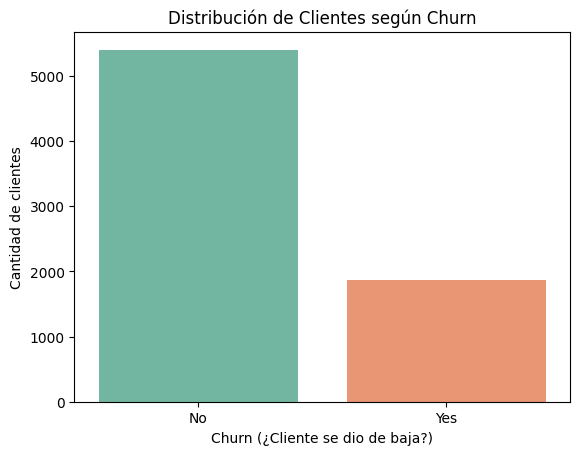

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df_clean, palette="Set2")
plt.title("Distribución de Clientes según Churn")
plt.xlabel("Churn (¿Cliente se dio de baja?)")
plt.ylabel("Cantidad de clientes")
plt.show()


PASTEL

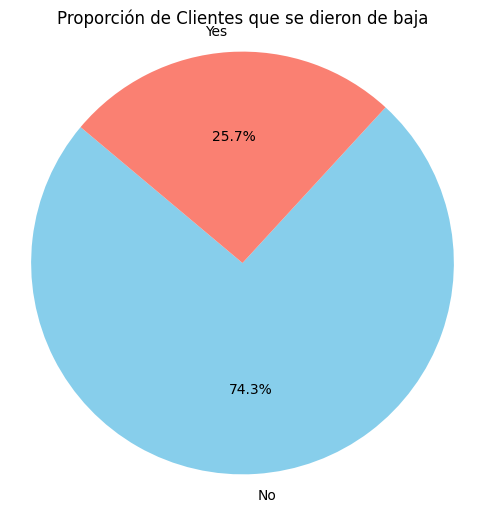

In [36]:
labels = df_clean['Churn'].value_counts().index
sizes = df_clean['Churn'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Proporción de Clientes que se dieron de baja")
plt.axis('equal')
plt.show()


# Recuento de Evasion

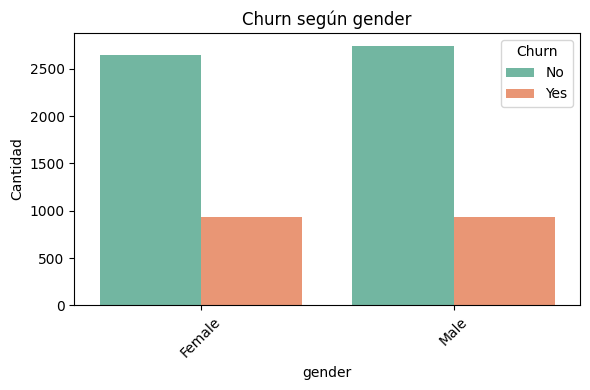

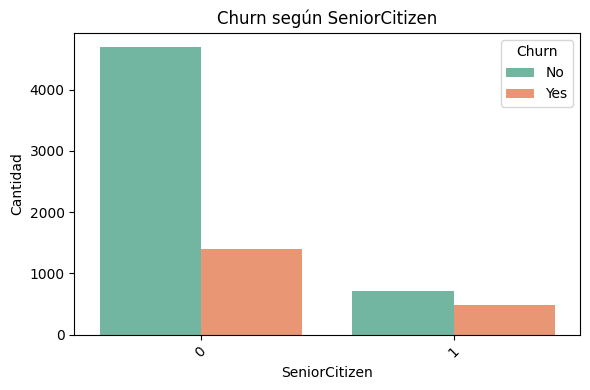

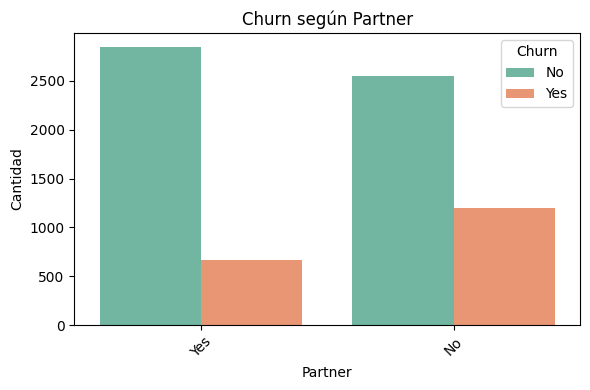

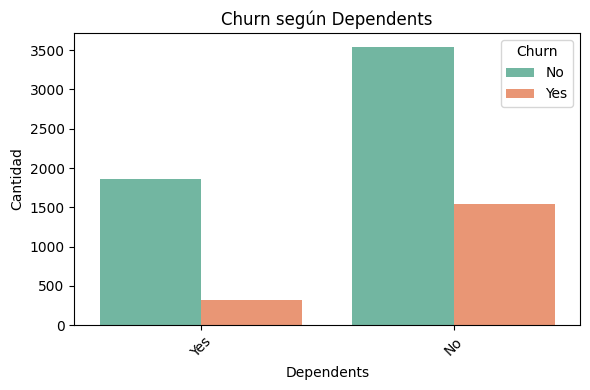

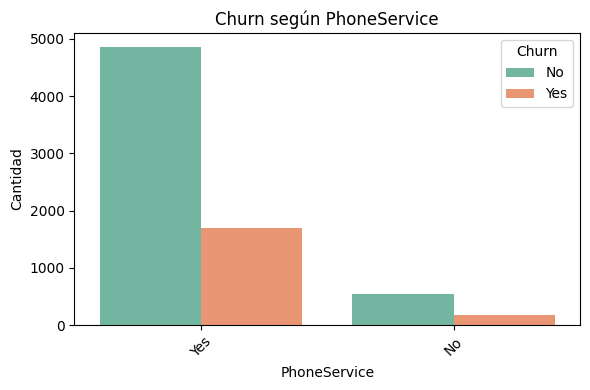

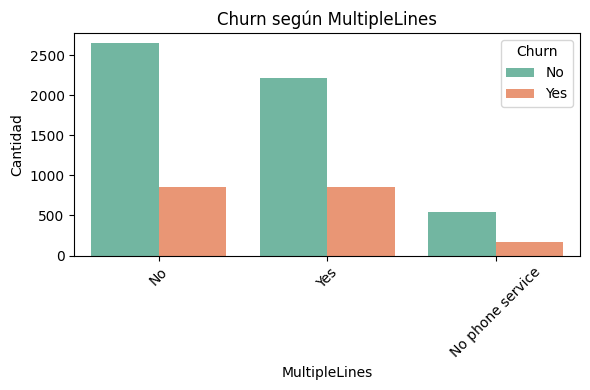

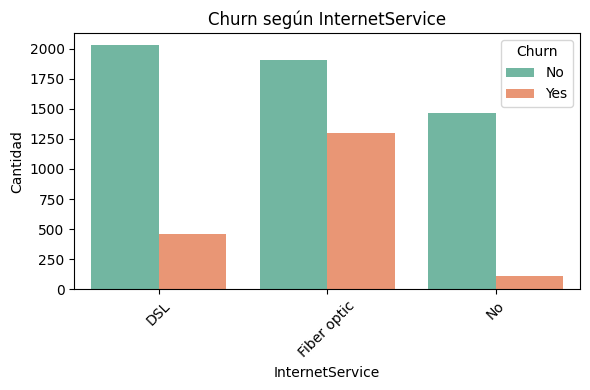

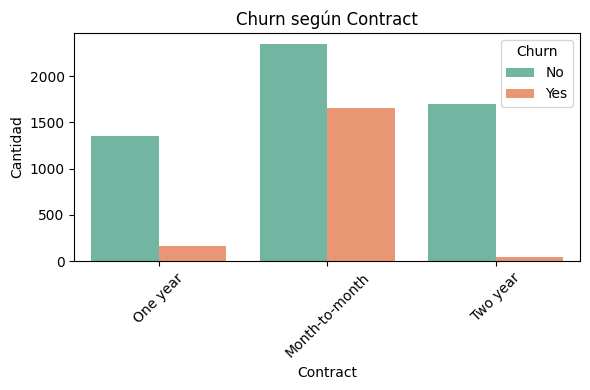

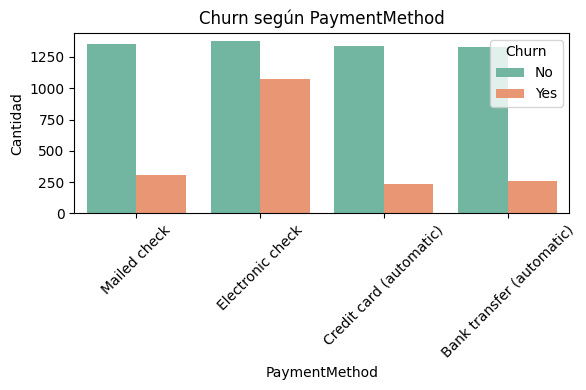

In [37]:
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'Contract', 'PaymentMethod']

for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_clean, x=col, hue='Churn', palette='Set2')
    plt.title(f"Churn según {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()


In [38]:
pd.crosstab(df_clean['Contract'], df_clean['Churn'], normalize='index') * 100

Churn,No,Yes
Contract,,
Month-to-month,58.676654,41.323346
One year,89.071758,10.928242
Two year,97.246127,2.753873


## Conteo de evasion por variable numericas

<ipython-input-40-2779522469>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='tenure', palette='Set2')


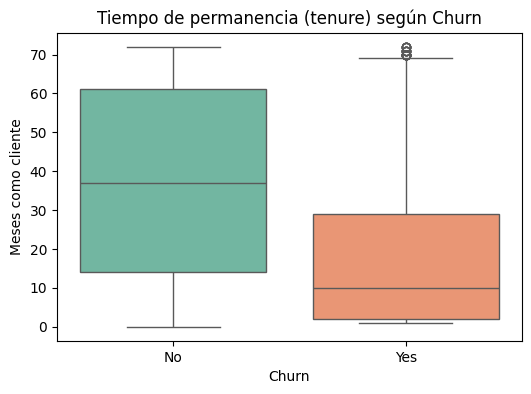

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Churn', y='tenure', palette='Set2')
plt.title("Tiempo de permanencia (tenure) según Churn")
plt.xlabel("Churn")
plt.ylabel("Meses como cliente")
plt.show()

<ipython-input-42-4090459991>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='Charges.Monthly', palette='Set2')


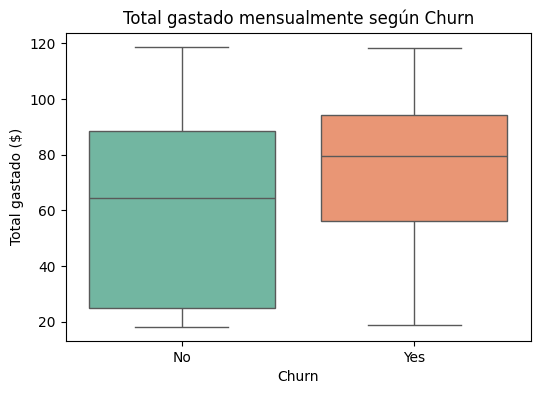

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Churn', y='Charges.Monthly', palette='Set2')
plt.title("Total gastado mensualmente según Churn")
plt.xlabel("Churn")
plt.ylabel("gastado ($)")
plt.show()


#📄Informe final

El presente análisis tiene como objetivo comprender los factores que influyen en la **evasión de clientes (Churn)** en una empresa de servicios. La evasión de clientes representa una pérdida significativa para cualquier negocio, por lo que identificar patrones asociados con la baja de clientes es esencial para diseñar estrategias de retención efectivas.

Utilizamos un conjunto de datos con información demográfica, de servicios contratados y comportamiento de facturación de los clientes para encontrar correlaciones entre estas variables y la variable objetivo: Churn.



## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- **Revisión de valores nulos y vacíos**: Se identificaron campos vacíos en la columna Churn.
- **Normalización de columnas anidadas**: Las columnas que contenían diccionarios o estructuras anidadas fueron normalizadas y combinadas nuevamente al DataFrame principal.
- **Unificación de datos limpios**: Las tablas limpias fueron concatenadas con el DataFrame principal usando pd.concat().



## 🔹 Análisis Exploratorio de Datos

###  Distribución general de evasion
- Se generaron gráficos de barras y de pastel para visualizar la proporción de clientes que cancelaron vs. los que permanecieron.
- Resultado: el 25 % se dieron de baja

###  Análisis por variables categóricas
Se exploró la relación entre la evasion y variables como:

- **Género**: No se encontraron diferencias significativas.
- **Tipo de contrato**: Los contratos mensuales tienen una mayor tasa de cancelación.
- **Método de pago**: Los clientes que usan "Electronic check" tienen más probabilidad de evasion.
- **InternetService**: El servicio de fibra óptica se asocia con una mayor tasa de evasión.

Gráficos de barras apilados se usaron para representar estos patrones.

###  Análisis por variables numéricas
Se analizaron:
- **Tenure (tiempo como cliente)**: Clientes con menos de 12 meses muestran tasas de cancelación elevadas.
- **Cargos Mensuales (Charges.Monthly)**: Clientes con cargos más altos mostraron una leve tendencia a cancelar más.

Se usaron boxplots y histogramas segmentados por evasion.



## 🔹 Conclusiones e Insights

- La **duración del contrato** es uno de los factores más fuertes asociados con la retención. Los contratos a largo plazo tienen evasion mucho menor.
- Los clientes con **menos de un año** de permanencia son significativamente más propensos a cancelar.
- El **método de pago** influye en la evasión. Métodos automáticos como tarjeta de crédito tienen menor evasion.
- No hay evidencia de sesgo por **género** o **edad**.



## 🔹 Recomendaciones Estratégicas

1.  **Ofrecer incentivos por contrato anual**: Como descuentos o beneficios especiales para aumentar la retención.
2. **Intervención temprana**: Contactar a clientes dentro de los primeros 3–6 meses para asegurar su satisfacción.
3.  **Fomentar métodos de pago automáticos**: Ofrecer beneficios a quienes elijan métodos con menor tasa de evasion.
4.  **Revisar calidad del servicio de fibra óptica**, que presenta alta cancelación: podría haber problemas técnicos o de atención al cliente.